# Machine Learning analysis on 5G attacks dataset

In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import OrdinalEncoder
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns

In [2]:
dfattacks_BS1  = pd.read_csv("BTS_1.csv", sep=",", names = ["Flgs", "Seq", "Dur", "RunTime", "Mean", "Sum", "Min", "Max", "Proto", "sTos", "dTos", "sDSb", 
                                                            "dDSb", "sTtl", "dTtl", "sHops", "dHops","Cause","TotPkts","SrcPkts","DstPkts","TotBytes",
                                                            "SrcBytes","DstBytes", "Offset", "sMeanPktSz", "dMeanPktSz", "Load", "SrcLoad", "DstLoad",
         "Loss","SrcLoss", "DstLoss", "pLoss", "SrcGap", "DstGap", "Rate", "SrcRate", "DstRate", "State", "SrcWin", "DstWin", "sVid", "dVid", "SrcTCPBase", 
         "DstTCPBase", "TcpRtt", "SynAck", "AckDat", "Label", "Attack_Type", "Attack_Tool"], low_memory=False,  header=0)
dfattacks_BS2  = pd.read_csv("BTS_2.csv", sep=",", names = ["Flgs", "Seq", "Dur", "RunTime", "Mean", "Sum", "Min", "Max", "Proto", "sTos", "dTos", "sDSb", "dDSb",
                                                            "sTtl", "dTtl", "sHops", "dHops", "Cause","TotPkts","SrcPkts","DstPkts","TotBytes","SrcBytes","DstBytes",
                                                            "Offset", "sMeanPktSz", "dMeanPktSz", "Load", "SrcLoad", "DstLoad","Loss","SrcLoss", "DstLoss", "pLoss",
                                                            "SrcGap", "DstGap", "Rate", "SrcRate", "DstRate", "State", "SrcWin", "DstWin", "sVid", "dVid", "SrcTCPBase", 
         "DstTCPBase", "TcpRtt", "SynAck", "AckDat", "Label", "Attack_Type", "Attack_Tool"], low_memory=False, header=0)

#data.head()
#data.info() # also checking for missing values 

In [3]:
dfattacks_BS1 = dfattacks_BS1.drop(['dVid', 'SrcTCPBase','DstTCPBase', 'DstWin', 'SrcWin', 'sVid', 'SrcGap', 'DstGap', 'dHops', 'dTtl', 'dDSb', 'dTos'  ], axis=1)

In [4]:
dfattacks_BS2 = dfattacks_BS2.drop(['dVid', 'SrcTCPBase','DstTCPBase', 'DstWin', 'SrcWin', 'sVid', 'SrcGap', 'DstGap', 'dHops', 'dTtl', 'dDSb', 'dTos'  ], axis=1)

In [5]:
dfattacks_BS1 = dfattacks_BS1.drop(["Dur", "Mean", "Sum", "Min", "Max", "SrcPkts", 
                                    "DstPkts", "TotBytes", "SrcBytes", "SrcLoad" , "DstLoad", "SrcLoss",
                                    "Rate", "SrcRate", "DstRate", "AckDat", "Attack_Type", "Attack_Tool"], axis=1)
dfattacks_BS1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 728316 entries, 0 to 728315
Data columns (total 22 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Flgs        728316 non-null  object 
 1   Seq         728316 non-null  int64  
 2   RunTime     728316 non-null  float64
 3   Proto       728316 non-null  object 
 4   sTos        728116 non-null  float64
 5   sDSb        728116 non-null  object 
 6   sTtl        728116 non-null  float64
 7   sHops       728116 non-null  float64
 8   Cause       728316 non-null  object 
 9   TotPkts     728316 non-null  int64  
 10  DstBytes    728316 non-null  int64  
 11  Offset      728316 non-null  int64  
 12  sMeanPktSz  728316 non-null  float64
 13  dMeanPktSz  728316 non-null  float64
 14  Load        728316 non-null  float64
 15  Loss        728316 non-null  int64  
 16  DstLoss     728316 non-null  int64  
 17  pLoss       728316 non-null  float64
 18  State       728316 non-null  object 
 19  Tc

In [6]:
dfattacks_BS2 = dfattacks_BS2.drop(["Dur", "Mean", "Sum", "Min", "Max", "SrcPkts", 
                                    "DstPkts", "TotBytes", "SrcBytes", "SrcLoad" , "DstLoad", "SrcLoss",
                                    "Rate", "SrcRate", "DstRate", "AckDat", "Attack_Type", "Attack_Tool"], axis=1)
dfattacks_BS2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 487574 entries, 0 to 487573
Data columns (total 22 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Flgs        487574 non-null  object 
 1   Seq         487574 non-null  int64  
 2   RunTime     487574 non-null  float64
 3   Proto       487574 non-null  object 
 4   sTos        487560 non-null  float64
 5   sDSb        487560 non-null  object 
 6   sTtl        487560 non-null  float64
 7   sHops       487560 non-null  float64
 8   Cause       487574 non-null  object 
 9   TotPkts     487574 non-null  int64  
 10  DstBytes    487574 non-null  int64  
 11  Offset      487574 non-null  int64  
 12  sMeanPktSz  487574 non-null  float64
 13  dMeanPktSz  487574 non-null  float64
 14  Load        487574 non-null  float64
 15  Loss        487574 non-null  int64  
 16  DstLoss     487574 non-null  int64  
 17  pLoss       487574 non-null  float64
 18  State       487574 non-null  object 
 19  Tc

In [7]:
CombBS1_BS2 = pd.concat([dfattacks_BS1, dfattacks_BS2] )

CombBS1_BS2.dropna(inplace=True)
CombBS1_BS2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1215676 entries, 0 to 487573
Data columns (total 22 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   Flgs        1215676 non-null  object 
 1   Seq         1215676 non-null  int64  
 2   RunTime     1215676 non-null  float64
 3   Proto       1215676 non-null  object 
 4   sTos        1215676 non-null  float64
 5   sDSb        1215676 non-null  object 
 6   sTtl        1215676 non-null  float64
 7   sHops       1215676 non-null  float64
 8   Cause       1215676 non-null  object 
 9   TotPkts     1215676 non-null  int64  
 10  DstBytes    1215676 non-null  int64  
 11  Offset      1215676 non-null  int64  
 12  sMeanPktSz  1215676 non-null  float64
 13  dMeanPktSz  1215676 non-null  float64
 14  Load        1215676 non-null  float64
 15  Loss        1215676 non-null  int64  
 16  DstLoss     1215676 non-null  int64  
 17  pLoss       1215676 non-null  float64
 18  State       1215676 non

In [8]:

#CombBS1_BS2= CombBS1_BS2.drop(["Attack_Tool", "Attack_Type"], axis=1)

CombBS1_BS2["Label"].value_counts()

Malicious    738153
Benign       477523
Name: Label, dtype: int64

In [9]:
data_y = CombBS1_BS2["Label"].replace(['Malicious', 'Benign'],[0, 1])

In [10]:
data = CombBS1_BS2.drop(["Label"], axis=1)

In [11]:
data['Flgs'] = pd.factorize(data['Flgs'])[0]
data['Proto'] = pd.factorize(data['Proto'])[0]
data['Cause'] = pd.factorize(data['Cause'])[0]
data['State'] = pd.factorize(data['State'])[0]
data['sDSb'] = pd.factorize(data['sDSb'])[0]
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1215676 entries, 0 to 487573
Data columns (total 21 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   Flgs        1215676 non-null  int64  
 1   Seq         1215676 non-null  int64  
 2   RunTime     1215676 non-null  float64
 3   Proto       1215676 non-null  int64  
 4   sTos        1215676 non-null  float64
 5   sDSb        1215676 non-null  int64  
 6   sTtl        1215676 non-null  float64
 7   sHops       1215676 non-null  float64
 8   Cause       1215676 non-null  int64  
 9   TotPkts     1215676 non-null  int64  
 10  DstBytes    1215676 non-null  int64  
 11  Offset      1215676 non-null  int64  
 12  sMeanPktSz  1215676 non-null  float64
 13  dMeanPktSz  1215676 non-null  float64
 14  Load        1215676 non-null  float64
 15  Loss        1215676 non-null  int64  
 16  DstLoss     1215676 non-null  int64  
 17  pLoss       1215676 non-null  float64
 18  State       1215676 non

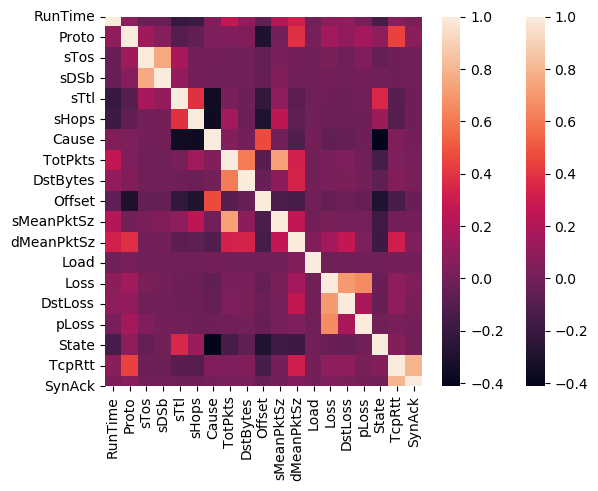

In [12]:
corr_BS1 = data.corr(numeric_only= False)
sns.heatmap(corr_BS1)

data = data.drop([ "Flgs", "Seq"], axis=1)
corr_BS1 = data.corr(numeric_only= False)
sns.heatmap(corr_BS1)

In [13]:
#Splitting the data
X_train, X_test,y_train, y_test = train_test_split(data, data_y, test_size=0.3, stratify=data_y)
y_train

380204    0
672962    1
369590    1
317016    1
184778    0
         ..
146090    0
656443    1
470405    0
585878    0
621267    0
Name: Label, Length: 850973, dtype: int64

In [14]:
X_train

,RunTime,Proto,sTos,sDSb,sTtl,sHops,Cause,TotPkts,DstBytes,Offset,sMeanPktSz,dMeanPktSz,Load,Loss,DstLoss,pLoss,State,TcpRtt,SynAck
380204,4.949210,2,0.0,0,63.0,1.0,1,15,11889,5747640,66.0,1188.900024,17724.041020,0,0,0.000000,6,0.023835,0.002130
672962,0.000000,1,0.0,0,249.0,7.0,0,1,0,2489952,74.0,0.000000,0.000000,0,0,0.000000,5,0.000000,0.000000
369590,2.574131,1,0.0,0,63.0,1.0,1,2,0,27081020,42.0,0.000000,130.529480,0,0,0.000000,2,0.000000,0.000000
317016,2.582121,1,0.0,0,63.0,1.0,1,2,0,22646136,42.0,0.000000,130.125595,0,0,0.000000,2,0.000000,0.000000
184778,0.000000,1,0.0,0,63.0,1.0,1,1,0,11609604,42.0,0.000000,0.000000,0,0,0.000000,2,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146090,2.275742,1,0.0,0,63.0,1.0,1,2,0,8194044,42.0,0.000000,147.644150,0,0,0.000000,2,0.000000,0.000000
656443,0.000000,1,0.0,0,249.0,7.0,0,1,0,17923248,74.0,0.000000,0.000000,0,0,0.000000,5,0.000000,0.000000
470405,3.543169,2,0.0,0,63.0,1.0,1,8,264,3250724,67.0,66.000000,900.888428,0,0,0.000000,1,0.014956,0.002237
585878,3.042696,2,0.0,0,63.0,1.0,0,9,140,4393288,310.0,70.000000,5074.447266,4,0,30.769231,1,0.100889,0.001893


In [15]:
# It is not balanced resampling training
sm = SMOTE(random_state=42)
X_train, y_train = sm.fit_resample(X_train, y_train)

y_train.value_counts()

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f9435ef0d30>
Traceback (most recent call last):
  File "/home/josi/anaconda3/lib/python3.10/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/josi/anaconda3/lib/python3.10/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/josi/anaconda3/lib/python3.10/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/josi/anaconda3/lib/python3.10/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'


0    516707
1    516707
Name: Label, dtype: int64

In [16]:
y_test.value_counts()

0    221446
1    143257
Name: Label, dtype: int64

In [17]:
# It is not balanced resampling test
sm = SMOTE(random_state=42)
X_test, y_test = sm.fit_resample(X_test, y_test)

y_test.value_counts()

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f9435f28280>
Traceback (most recent call last):
  File "/home/josi/anaconda3/lib/python3.10/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/josi/anaconda3/lib/python3.10/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/josi/anaconda3/lib/python3.10/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/josi/anaconda3/lib/python3.10/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'


1    221446
0    221446
Name: Label, dtype: int64

In [18]:
#Checking best values with gridSearch 

tree_classf = DecisionTreeClassifier(random_state=42)
tree_classf = GridSearchCV(tree_classf,
             param_grid={'max_depth': [1, 3, 5, 7, 9], 'criterion': ["gini", "entropy", "log_loss"]}, cv=5, scoring="accuracy" )

tree_classf.fit(X_train, y_train)
tree_classf.cv_results_,tree_classf.best_params_, tree_classf.best_score_,
tree_classf.best_params_

{'criterion': 'gini', 'max_depth': 9}

In [19]:
tree_classf = DecisionTreeClassifier(criterion=tree_classf.best_params_["criterion"], max_depth=tree_classf.best_params_["max_depth"])
tree_classf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=9)

Rememeber that amazing blog post from a few paragraphs ago, that demonstrated how to visualize and interpret the results of your Decision Tree model. We've seen that this can perform very well, but let's see how it does on the "German Credit" dataset that we're working on, due to it being a bit larger than the one used by the blog authors.

In [20]:
tree_classf.predict_proba(X_test)

array([[0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       ...,
       [0.        , 1.        ],
       [0.00183962, 0.99816038],
       [0.        , 1.        ]])

In [21]:
y_pred_train = tree_classf.predict(X_train)
y_pred_test = tree_classf.predict(X_test)
train_scores = accuracy_score( y_pred_train, y_train) 
train_scores

0.9797699663445628

In [22]:
dt_acc = accuracy_score(y_pred_test, y_test) 
dt_acc

0.9799364179077518

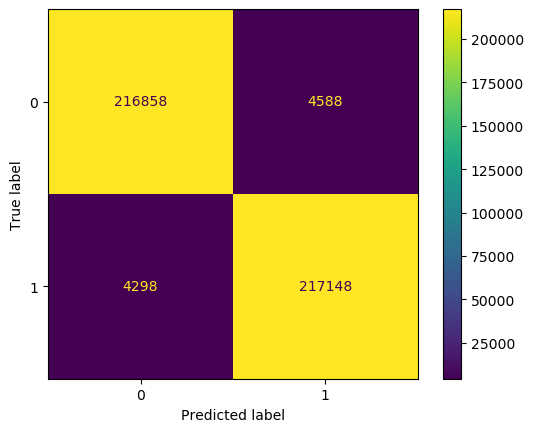

In [23]:
cm = confusion_matrix(y_test, y_pred_test, labels=tree_classf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=tree_classf.classes_)
disp.plot()
plt.show()

In [24]:
target_names= ["Bad", "Good"]
print(classification_report(y_test, y_pred_test, target_names=target_names))

              precision    recall  f1-score   support

         Bad       0.98      0.98      0.98    221446
        Good       0.98      0.98      0.98    221446

    accuracy                           0.98    442892
   macro avg       0.98      0.98      0.98    442892
weighted avg       0.98      0.98      0.98    442892



## Random Forests

In [25]:
from sklearn.ensemble import RandomForestClassifier

In [26]:
randf_classf = RandomForestClassifier(random_state=42)
randf_classf = GridSearchCV(randf_classf,
             param_grid={'max_depth': [3, 5, 7 ], 'criterion': ["gini"], "n_estimators":[ 300]}, cv=5, scoring="f1")
randf_classf.fit(X_train, y_train);
randf_classf.best_params_, randf_classf.best_score_

({'criterion': 'gini', 'max_depth': 7, 'n_estimators': 300},
 0.9679961844670553)

In [27]:
randf_classf = RandomForestClassifier(max_depth=randf_classf.best_params_["max_depth"], 
                                      criterion=randf_classf.best_params_["criterion"], n_estimators=randf_classf.best_params_["n_estimators"])
randf_classf.fit(X_train, y_train)
y_pred_test = randf_classf.predict(X_test)

rf_acc = accuracy_score( y_pred_test, y_test) 

target_names= ["Bad", "Good"]
print(classification_report(y_test, y_pred_test, target_names=target_names))

              precision    recall  f1-score   support

         Bad       1.00      0.93      0.97    221446
        Good       0.94      1.00      0.97    221446

    accuracy                           0.97    442892
   macro avg       0.97      0.97      0.97    442892
weighted avg       0.97      0.97      0.97    442892



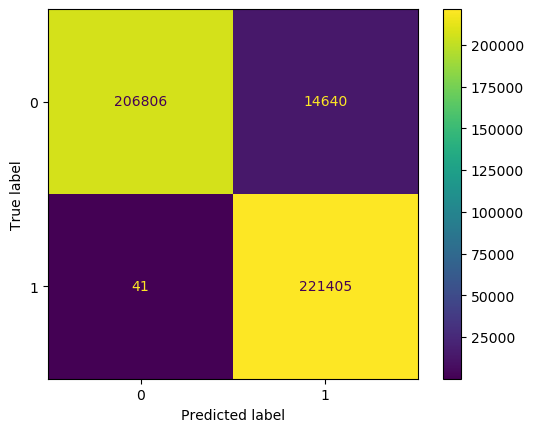

In [28]:
cm = confusion_matrix(y_test, y_pred_test, labels=randf_classf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=randf_classf.classes_)
disp.plot()
plt.show()

Elapsed time to compute the importances: 0.064 seconds


Text(0, 0.5, 'Mean decrease in impurity')

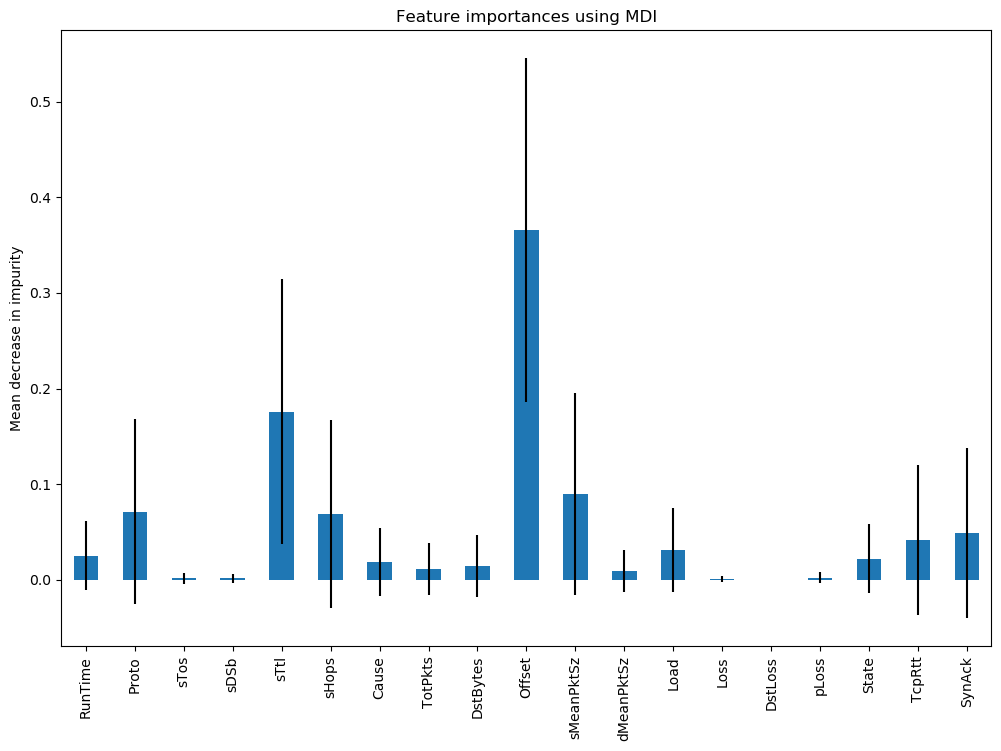

In [29]:
import time
import numpy as np

start_time = time.time()
importances = randf_classf.feature_importances_
std = np.std([tree.feature_importances_ for tree in randf_classf.estimators_], axis=0)
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

import pandas as pd
forest_importances = pd.Series(importances, index=data.columns)

fig, ax = plt.subplots(figsize =(12, 8))
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")

In [30]:
#! pip install pdpbox

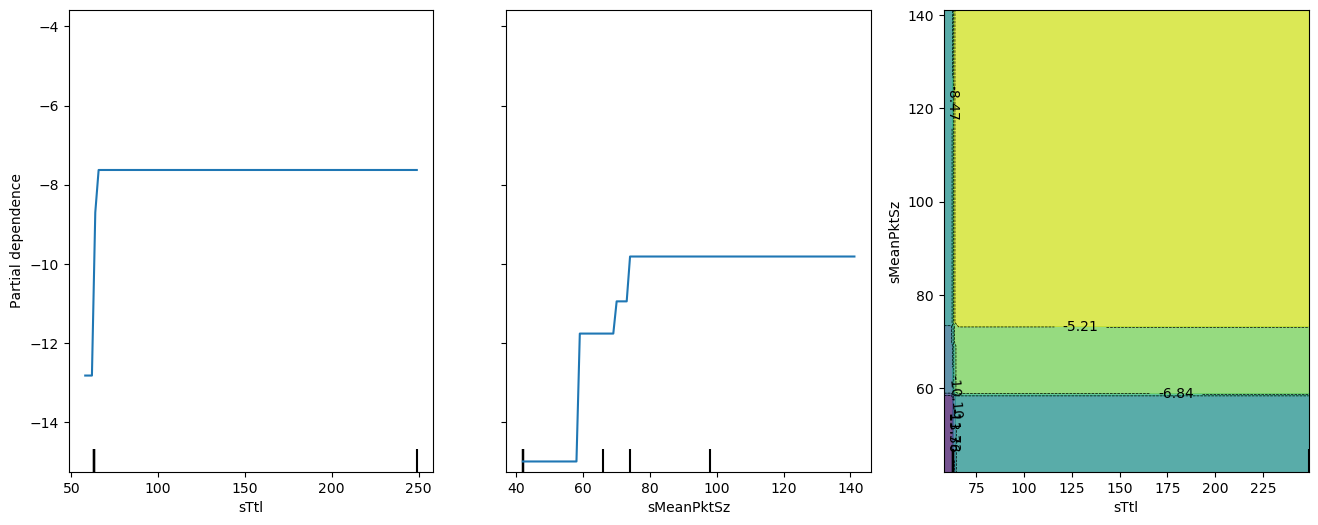

In [32]:
from sklearn.datasets import make_hastie_10_2
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.inspection import PartialDependenceDisplay

fig, ax = plt.subplots(figsize=(16, 6))
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,
     max_depth=1, random_state=0).fit(X_train, y_train)
features = [4, 10, (4, 10)]
PartialDependenceDisplay.from_estimator(clf, X_train, features, ax=ax)

## (Optional) Advanced Boosting-Based Algorithms

As explained in the video lectures, the next generation of algorithms after Random Forests (that use Bagging, a.k.a. Bootstrap Aggregation) were developed using Boosting, and the first one of these were Gradient Boosted Machines, which are implemented in scikit-learn (http://scikit-learn.org/stable/modules/ensemble.html#gradient-tree-boosting).

Still, in recent years, a number of variations on GBMs have been developed by different research amd industry groups, all of them bringing improvements, both in speed, accuracy and functionality to the original Gradient Boosting algorithms.

In no order of preference, these are:
1. **XGBoost**: https://xgboost.readthedocs.io/en/latest/
2. **CatBoost**: https://tech.yandex.com/catboost/
3. **LightGBM**: https://lightgbm.readthedocs.io/en/latest/

If you're using the Anaconda distribution, these are all very easy to install:

In [33]:
#! conda install -c anaconda py-xgboost

In [34]:
#! conda install -c conda-forge catboost

In [35]:
#! conda install -c conda-forge lightgbm

Your task in this optional section of the mini project is to read the documentation of these three libraries, and apply all of them to the "German Credit" dataset, just like you did in the case of Decision Trees and Random Forests.

The final deliverable of this section should be a table (can be a pandas DataFrame) which shows the accuracy of all the five algorthms taught in this mini project in one place.

Happy modeling! :)

In [36]:
from xgboost import XGBClassifier
import lightgbm as lgb
import numpy as np
from catboost import CatBoostClassifier, Pool

In [37]:
#Using GridSearchCV in XGB

xgb_classf = XGBClassifier(random_state=42)
xgb_classf = GridSearchCV(xgb_classf,
             param_grid={'max_depth': [ 2,3, 5, ], 'learning_rate': [0.001, 0.01,0.1,1], "n_estimators": [5,25,50]}, cv=5, scoring="accuracy" )
xgb_classf.fit(X_train, y_train)
xgb_classf.best_params_, xgb_classf.best_score_

({'learning_rate': 1, 'max_depth': 5, 'n_estimators': 25}, 0.9823894372618092)

In [38]:
xgb_classf = XGBClassifier(random_state=42, learning_rate = xgb_classf.best_params_['learning_rate'], n_estimators = xgb_classf.best_params_['n_estimators'],
                         max_depth = xgb_classf.best_params_['max_depth'] )
xgb_classf.fit(X_train, y_train)
y_pred_test = xgb_classf.predict(X_test)

xgb_acc = accuracy_score( y_pred_test, y_test) 

In [39]:
target_names= ["Bad", "Good"]
print(classification_report(y_test, y_pred_test, target_names=target_names))

              precision    recall  f1-score   support

         Bad       0.98      0.99      0.98    221446
        Good       0.99      0.98      0.98    221446

    accuracy                           0.98    442892
   macro avg       0.98      0.98      0.98    442892
weighted avg       0.98      0.98      0.98    442892



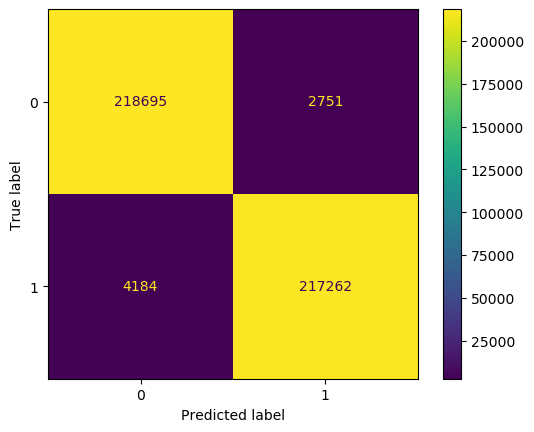

In [40]:
cm = confusion_matrix(y_test, y_pred_test, labels=xgb_classf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=xgb_classf.classes_)
disp.plot()
plt.show()

In [41]:
## CATBoost 

In [42]:
%%capture
cat_classf = CatBoostClassifier(random_state=42, verbose=False)
cat_classf = GridSearchCV(cat_classf,
             param_grid={'depth': [ 2,3, 5, 7], 'learning_rate': [0.001, 0.01,0.1,1], "iterations": [1,2,3,5,10]}, cv=5, scoring="accuracy" )
cat_classf.fit(X_train, y_train)
cat_classf.best_params_, cat_classf.best_score_

In [43]:
model = CatBoostClassifier(iterations=cat_classf.best_params_["iterations"], depth=cat_classf.best_params_["depth"], 
                          learning_rate=cat_classf.best_params_["learning_rate"],random_state=42, verbose=False);
# train the model
model.fit(X_train, y_train);
y_pred_test = model.predict(X_test)
preds_proba = model.predict_proba(X_test)

cat_acc = accuracy_score( y_pred_test, y_test) 

In [44]:
target_names= ["Bad", "Good"]
print(classification_report(y_test, y_pred_test, target_names=target_names))

              precision    recall  f1-score   support

         Bad       0.98      0.99      0.98    221446
        Good       0.99      0.98      0.98    221446

    accuracy                           0.98    442892
   macro avg       0.98      0.98      0.98    442892
weighted avg       0.98      0.98      0.98    442892



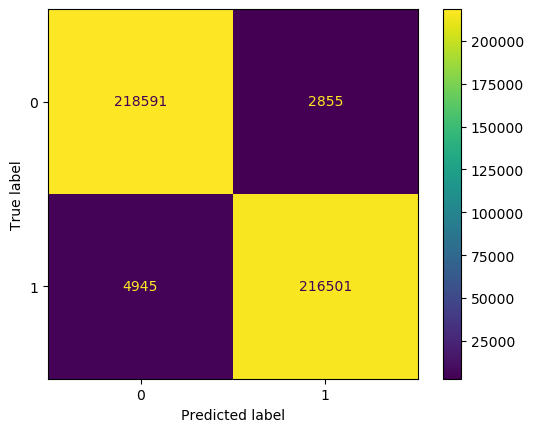

In [45]:
cm = confusion_matrix(y_test, y_pred_test, labels=cat_classf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=cat_classf.classes_)
disp.plot()
plt.show()

In [46]:
## LGBMClassifier

In [47]:
%%capture 
lgb_classif = lgb.LGBMClassifier(random_state=42)
model = GridSearchCV(lgb_classif,
             param_grid={'max_depth': [1, 3, 5, 7, 9 ], 'learning_rate': [0.001, 0.01, 0.1]}, cv=2, scoring="accuracy");
model.fit(X_train,y_train);
model.best_params_

In [48]:
%%capture 
lgb_classif = lgb.LGBMClassifier(learning_rate=model.best_params_["learning_rate"], max_depth=model.best_params_["max_depth"],
                           random_state=42)

lgb_classif.fit(X_train,y_train)

y_pred_test = lgb_classif.predict(X_test)
preds_proba = lgb_classif.predict_proba(X_test)

lgb_acc = accuracy_score( y_pred_test, y_test) 

In [49]:
target_names= ["Bad", "Good"]
print(classification_report(y_test, y_pred_test, target_names=target_names))

              precision    recall  f1-score   support

         Bad       0.98      0.99      0.98    221446
        Good       0.99      0.98      0.98    221446

    accuracy                           0.98    442892
   macro avg       0.98      0.98      0.98    442892
weighted avg       0.98      0.98      0.98    442892



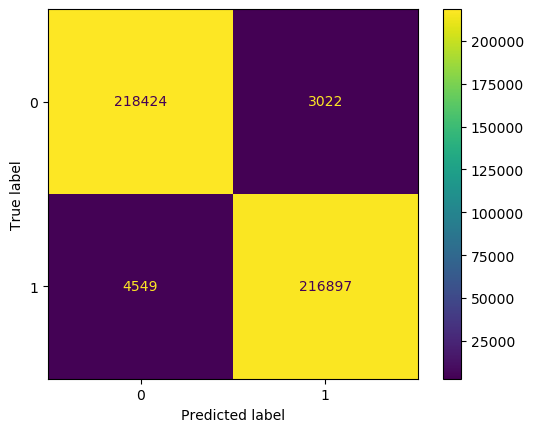

In [50]:
cm = confusion_matrix(y_test, y_pred_test, labels=lgb_classif.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=lgb_classif.classes_)
disp.plot()
plt.show()

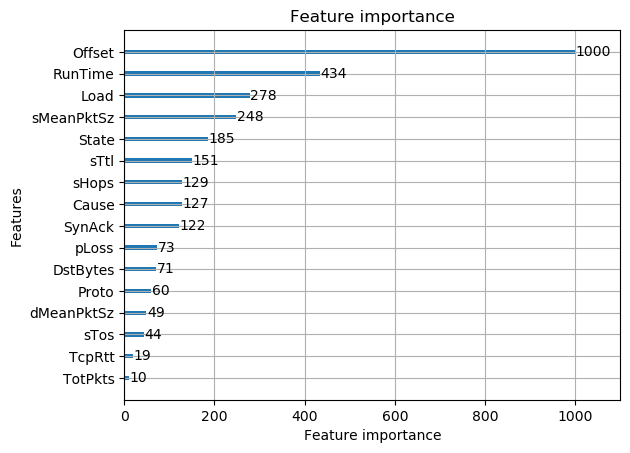

In [51]:
lgb.plot_importance(lgb_classif)

In [52]:
scores = {'DT': [dt_acc], 'RF': [rf_acc], 'XGB': [xgb_acc], 'CAT': [cat_acc], 'LGB' : [lgb_acc]}
df = pd.DataFrame(data=scores)
df



,DT,RF,XGB,CAT,LGB
0,0.979936,0.966852,0.984342,0.982388,0.982906
